In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

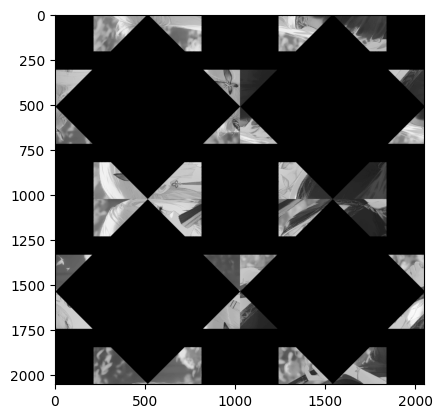

In [3]:
scramble = plt.imread("senheScramble.jpg")
plt.imshow(scramble, cmap='gray')

In [4]:
def splitImage(img,x,y):
     result = []
     splitY = img.shape[0] // y
     splitX = img.shape[1] // x

     for i in range(y):
          for j in range(x):
               splitImage = img[i * splitY:(i + 1) * splitY, j * splitX:(j + 1) * splitX]
               result.append(splitImage)
     return result

In [5]:
def mergeImage(splitImg,x,y):
     height, width = splitImg[0].shape
     mergeY = height * y
     mergeX = width * x

     result = np.zeros((mergeY, mergeX), dtype=np.uint8)
     index = 0
     for i in range(y):
          for j in range(x):
               result[i * height: (i + 1) * height, j * width: (j + 1) * width] = splitImg[index]
               index += 1
     return result

In [6]:
def rotation(image, sudut):
     result = np.zeros(image.shape)
     degree = sudut*(np.pi/180)

     mid_x = image.shape[1]//2
     mid_y = image.shape[0]//2

     for i in range(image.shape[0]):
          for j in range(image.shape[1]):
               x2 = int((i - mid_x) * np.cos(degree) - (j - mid_y) * np.sin(degree) + mid_x) 
               y2 = int((i - mid_x) * np.sin(degree) + (j - mid_y) * np.cos(degree) + mid_x)
               if 0 <= x2 < image.shape[0] and 0 <= y2 < image.shape[1]:
                    result[i][j] =  image[x2][y2]
     return result

In [7]:
def crop_img(img):
     top, bottom, left, right = 0, img.shape[0], 0, img.shape[1]
     for i in range(img.shape[0]):
          for j in range(img.shape[1]):
               if img[i, j] > 100:
                    top = i
                    break
          if top != 0:
               break

# Looping untuk mencari batas bawah (bottom)
     for i in range(img.shape[0] -1, -1, -1):
          for j in range(img.shape[1]):
               if img[i, j] > 100:
                    bottom = i
                    break
          if bottom != img.shape[0]:
               break

# Looping untuk mencari batas kiri (left)
     for j in range(img.shape[1]):
          for i in range(img.shape[0]):
               if img[i, j] > 100:
                    left = j
                    break
          if left != 0:
               break

# Looping untuk mencari batas kanan (right)
     for j in range(img.shape[1] -1, -1, -1):
          for i in range(img.shape[0]):
               if img[i, j] > 100:
                    right = j
                    break
          if right != img.shape[1]:
               break

# Crop citra menggunakan batas yang telah ditentukan
     result = img[top:bottom, left:right]
     return result

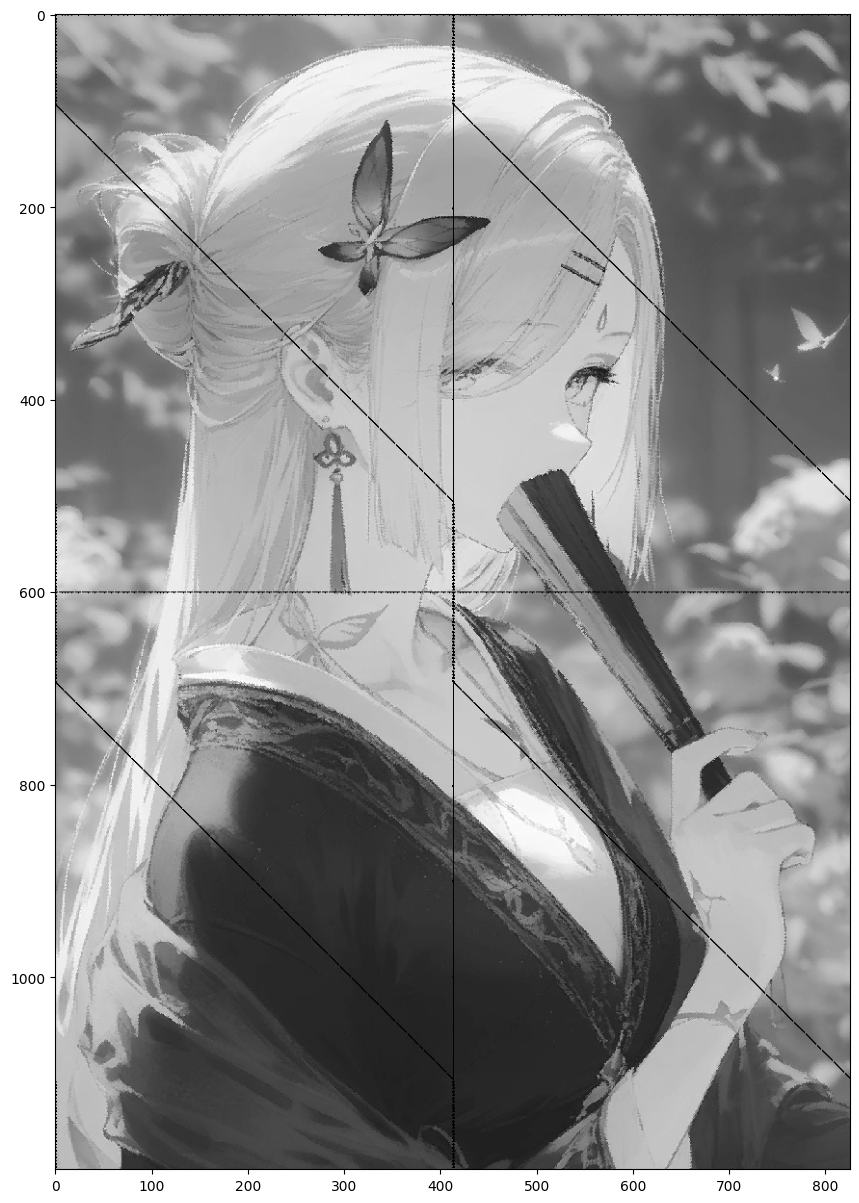

In [8]:
splitScramble = splitImage(scramble,2,2)
for i in range(4):
     for j in range(2):
          part = splitImage(splitScramble[i],2,2)
          part.reverse()
          splitScramble[i] = mergeImage(part,2,2)
          splitScramble[i] = rotation(splitScramble[i],45)
          splitScramble[i] = crop_img(splitScramble[i])

mergeScramble = np.concatenate((np.concatenate((splitScramble[0], splitScramble[2]), axis=1), np.concatenate((splitScramble[1], splitScramble[3]), axis=1)), axis=0)
plt.figure(figsize=(15,15))
plt.imshow(mergeScramble, cmap='gray')

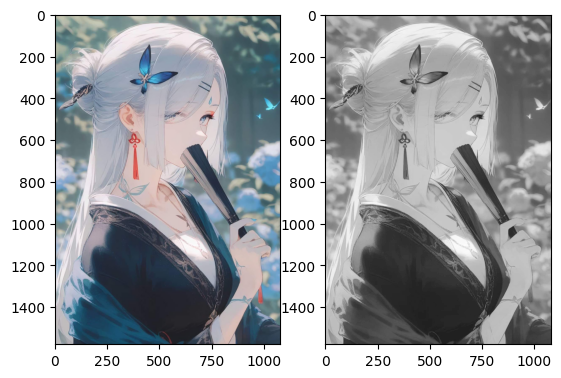

In [9]:
img = plt.imread("images.jpg")
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(gray, cmap='gray')

In [10]:
def histogram(img):
     result = np.zeros(256)
     for i in range(img.shape[0]):
          for  j in range(img.shape[1]):
               result[int(img[i][j])] += 1
     return result

In [11]:
def equalization(img):
     grayDistributed = histogram(img)

     equalizationProcess = np.zeros(256)
     equalizationProcess = grayDistributed / (img.shape[0] * img.shape[1])
     equalizationProcess = equalizationProcess * (256-1)
     equalizationProcess = np.cumsum(equalizationProcess)
     equalizationProcess = np.round(equalizationProcess)

     result = np.zeros(img.shape)
     for i in range(img.shape[0]):
          for  j in range(img.shape[1]):
               result[i][j] = equalizationProcess[int(img[i][j])]

     equaDistributed = histogram(result)
               
     return equalizationProcess, equaDistributed, result
               


<BarContainer object of 256 artists>

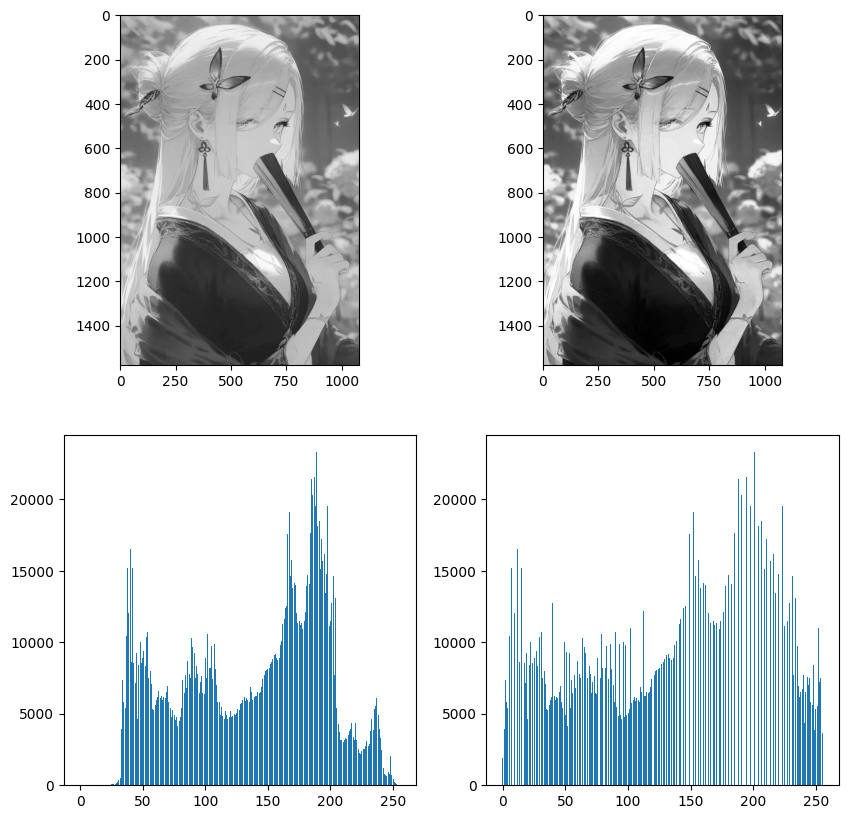

In [12]:
_,equahist, equa_img = equalization(gray)
hist = histogram(gray)

grayindex = [i for i in range(256)]

plt.figure(figsize=(10, 10))
plt.subplot(2,2,1)
plt.imshow(gray, cmap='gray')
plt.subplot(2,2,2)
plt.imshow(equa_img, cmap='gray')

plt.subplot(2,2,3)
plt.bar(grayindex,hist)
plt.subplot(2,2,4)
plt.bar(grayindex,equahist)

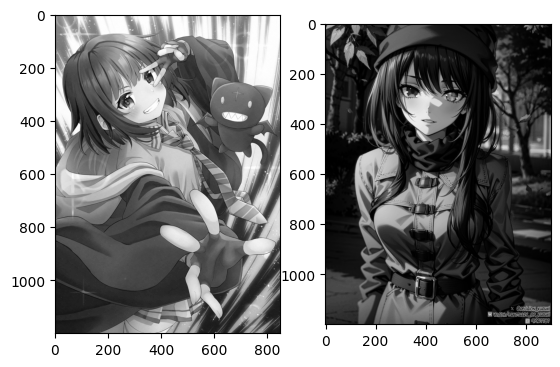

In [13]:
spec1 = plt.imread("megumin.jpg")
spec2 = plt.imread("kurumi.jpg")

spec1 = cv.cvtColor(spec1,cv.COLOR_BGR2GRAY)
spec2 = cv.cvtColor(spec2,cv.COLOR_BGR2GRAY)

plt.subplot(1,2,1)
plt.imshow(spec1, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(spec2, cmap='gray')

In [14]:
def specification(img, imgTarget):
    specImg,_,_ = equalization(img)
    specTarget,_,_ = equalization(imgTarget)

    minAtIndex = np.zeros(256).astype(int)
    for i in range(255):
        max_value=256
        for j in range(255):
            newmin = abs(specImg[i]-specTarget[j])
            if max_value > newmin:
                max_value = newmin
                minAtIndex[i] = j

    result = np.zeros(img.shape)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            result[i,j] = minAtIndex[round(img[i,j])]
    return result

<BarContainer object of 256 artists>

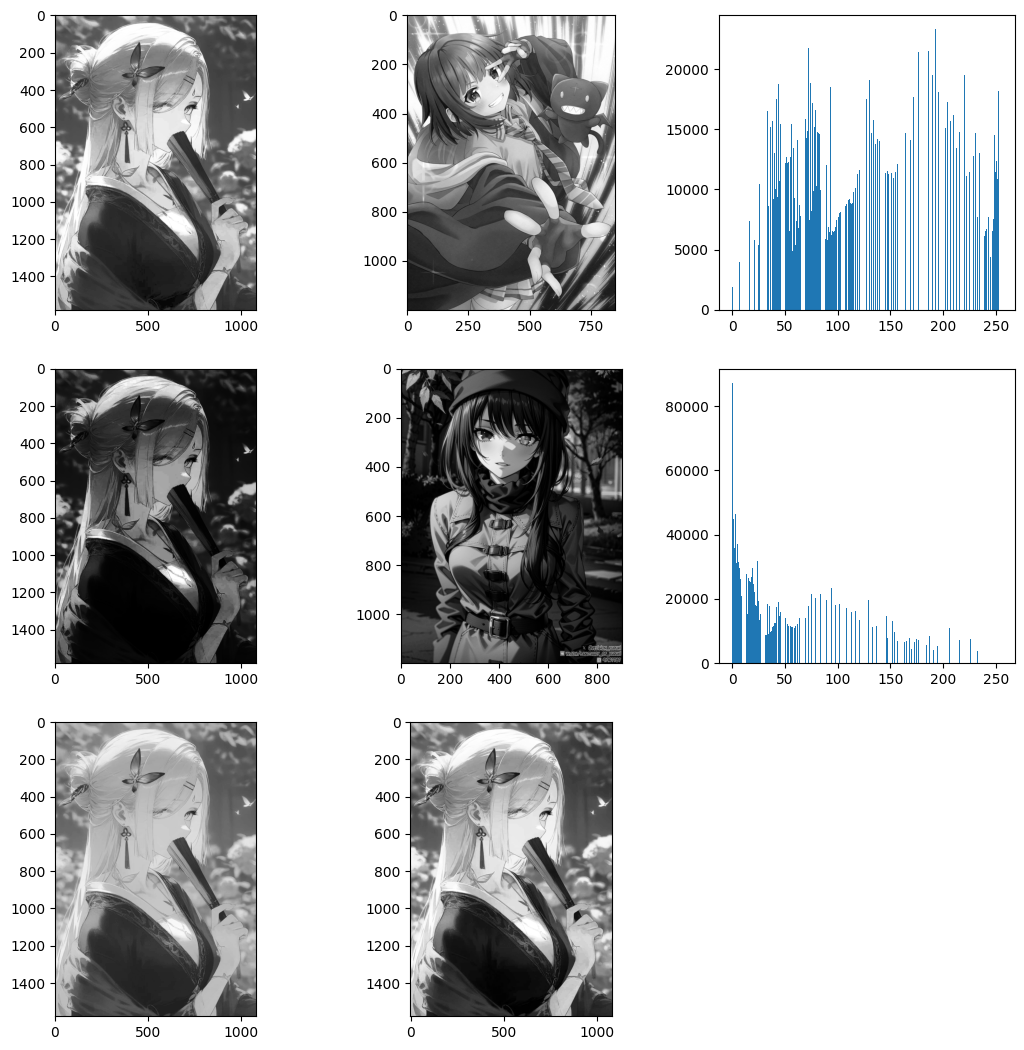

In [15]:
img_spec1 = specification(gray,spec1)
img_spec2 = specification(gray,spec2)

histspec1 = histogram(img_spec1)
histspec2 = histogram(img_spec2)

plt.figure(figsize= (13,13))
plt.subplot(3,3,1)
plt.imshow(img_spec1,cmap='gray')
plt.subplot(3,3,4)
plt.imshow(img_spec2,cmap='gray')
plt.subplot(3,3,7)
plt.imshow(gray,cmap='gray')
plt.subplot(3,3,8)
plt.imshow(equa_img,cmap='gray')
plt.subplot(3,3,2)
plt.imshow(spec1,cmap='gray')
plt.subplot(3,3,5)
plt.imshow(spec2,cmap='gray')
plt.subplot(3,3,3)
plt.bar(grayindex,histspec1)
plt.subplot(3,3,6)
plt.bar(grayindex,histspec2)

In [16]:
def splitSpecification(img, x, y, spec1, spec2):
     _,_,equa = equalization(img)
     splitequa  = splitImage(equa,x,y)
     
     # splitSpec1 = splitImage(spec1,x,y)
     # splitSpec2 = splitImage(spec2,x,y)
     
     for index in range(len(splitequa)):
          if np.floor(np.sum(splitequa[index])/(splitequa[index].shape[0] * splitequa[index].shape[1])) < 128:
               splitequa[index] = specification(splitequa[index],spec2)
               # splitequa[index] = splitSpec2[index]
          else:
               splitequa[index] = specification(splitequa[index],spec1)
               # splitequa[index] = splitSpec1[index]

     result = np.zeros(img.shape)
     result = mergeImage(splitequa,x,y)
     return result

In [17]:
testImg1 = splitSpecification(gray,1,1,spec1,spec2)
testImg2 = splitSpecification(gray,2,1,spec1,spec2)
testImg3 = splitSpecification(gray,2,2,spec1,spec2)
testImg4 = splitSpecification(gray,16,2,spec1,spec2)
testImg5 = splitSpecification(gray,16,16,spec1,spec2)

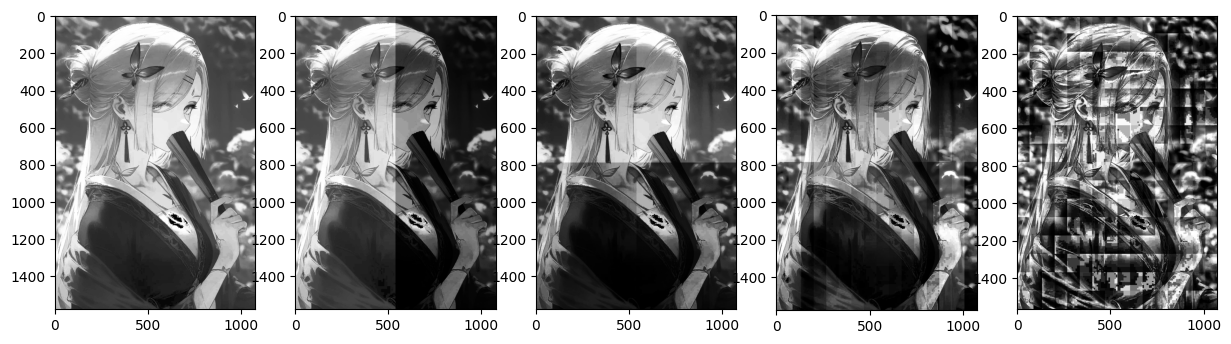

In [18]:
plt.figure(figsize=(15,15))
plt.subplot(1,5,1) 
plt.imshow(testImg1,cmap='gray')
plt.subplot(1,5,2) 
plt.imshow(testImg2,cmap='gray')
plt.subplot(1,5,3) 
plt.imshow(testImg3,cmap='gray')
plt.subplot(1,5,4) 
plt.imshow(testImg4,cmap='gray')
plt.subplot(1,5,5) 
plt.imshow(testImg5,cmap='gray')